In [1]:
from sklearn.manifold import TSNE
import pandas as pd
import importlib
import os
import sys

In [2]:
# Load the data for thermodynamic property pc
root_path = os.path.join(os.path.dirname(os.getcwd()))
pc_dataset_path = os.path.join(root_path,'Datasets','Group-1','pc.csv')
pc = pd.read_csv(pc_dataset_path)

In [3]:
# Visualizing few rows of data
pc.head()

,Smiles,Pc,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,CCC(C)(C)C(C)(C)C,27.35,6,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CC(C)CC(=O)CC(C)C,24.80,4,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=CCCCC,39.70,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCCCCCCCC(=O)O,23.50,1,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CCOP(=O)(OCC)OCC,45.99,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# GROUP CONTRIBUTION MOLECULAR REPRESENTATION
# Dropping Smiles and Pc columns to get group contribution values only
X_pc_gc = pc.drop(['Pc','Smiles'], axis=1)
Y_pc = pc['Pc'].to_numpy()
X_pc_gc.head()

,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,Group 10,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,6,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Fitting data to TSNE to get 2D and 3D data
pc_tsne_2D = TSNE(n_components=2, random_state=42,n_jobs=-1,perplexity=30.0).fit_transform(X_pc_gc)
pc_tsne_3D = TSNE(n_components=3, random_state=42,n_jobs=-1,perplexity=30.0).fit_transform(X_pc_gc)

In [6]:
# Importing plotting script
sys.path.append(os.path.join(root_path,'common_tools'))
plot_tools = importlib.import_module('plotting_script')

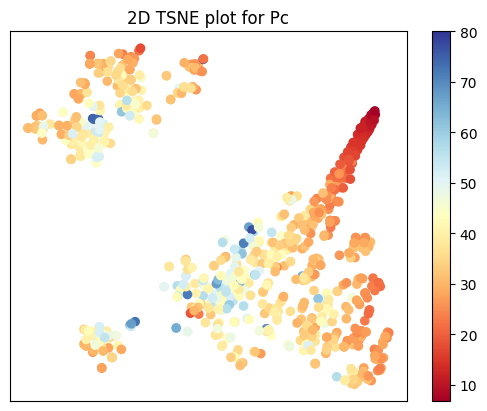

In [7]:
plot_tools.plot_2D_tsne(pc_tsne_2D, 'Pc', Y_pc)

In [8]:
plot_tools.plot_3D_tsne(pc_tsne_3D, 'Pc', Y_pc)

In [9]:
# Mol2vec MOLECULAR REPRESENTATION
# Importing mol2vec feature generator script
sys.path.append(os.path.join(root_path,'common_tools'))
mol2vec_feature_generator = importlib.import_module('mol2vec_feature_generator')
trained_mol2vec_model_path = os.path.join(root_path,'common_tools','model_300dim.pkl')

In [12]:
pc_dataset_path = os.path.join(root_path,'Datasets','Group-10','pKa.csv')
X_pc_mol2vec = pd.DataFrame(mol2vec_feature_generator.main(pc_dataset_path,trained_mol2vec_model_path))
X_pc_mol2vec.head()

[16:18:14] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 10


ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.GetMorganFingerprint(NoneType, int)
did not match C++ signature:
    GetMorganFingerprint(class RDKit::ROMol mol, unsigned int radius, class boost::python::api::object invariants=[], class boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, bool useCounts=True, class boost::python::api::object bitInfo=None, bool includeRedundantEnvironments=False)

In [ ]:
# Fitting data to TSNE to get 2D and 3D data
pc_tsne_2D = TSNE(n_components=2, random_state=42,n_jobs=-1,perplexity=30.0).fit_transform(X_pc_mol2vec)
pc_tsne_3D = TSNE(n_components=3, random_state=42,n_jobs=-1,perplexity=30.0).fit_transform(X_pc_mol2vec)

In [ ]:
plot_tools.plot_2D_tsne(pc_tsne_2D, 'Pc', Y_pc)

In [ ]:
plot_tools.plot_3D_tsne(pc_tsne_3D, 'Pc', Y_pc)